# OBJECTIVE:

**The goal of the case study is to work with the historical advertising data of a marketing agency from january 2020 to july 2020 and develop a machine learning model using Python to predict if a particular user will click on the Advertisement given on the website in future based on the user behaviour and user profile. Using the results we should be able to understand the customer demographics and behavior in order to support the business's advertising efforts and improve click-through rates and conversions.**

# Reading the data into python:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/prashastisaraf/Downloads/Ad click data.csv')
df.head()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0


**Data Description:**
*We have the historical data of various users and different ads which they were exposed to and if they have clicked on the ad or not.*

This data set contains the following features:

1. VistID: The id for the user who visits the website
2. Time_Spent: Average time spent by user on site in minutes
3. Age: User's age in years
4. Avg_Income: Average Income of the user
5. Internet_Usage: Average minutes a day user spent on the internet
6. Ad_Topic: Headline of the advertisement
7. Country_Name: Country of user
8. City_Code: City of user
9. Male: Whether or not user was male
10. Time_Period: Time at which consumer clicked on Ad
11. Weekday: Name of the day
12. Month: Name of the months
13. Year: Which year the data is collected
14. Clicked: 0 means not clicked and 1 means that user clicked the Ad.

We are mostly interested in the variable "Clicked" There are two possible outcomes for this variable: 0 and 1, where 0 denotes the situation in which a user did not click the advertisement and 1 denotes the event in which a user clicked the commercial.

**For the model we will use 'Clicked' as the target varable.**


# Basic Data Exploration:

In [3]:
print('Shape of the dataset is:', df.shape)

Shape of the dataset is: (6657, 14)


In [4]:
df.isnull().values.any()

False

In [5]:
df.duplicated().values.any()

False

*In this data none of the columns have any missing values or duplicate values*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657 entries, 0 to 6656
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VistID          6657 non-null   int64  
 1   Time_Spent      6657 non-null   float64
 2   Age             6657 non-null   int64  
 3   Avg_Income      6657 non-null   float64
 4   Internet_Usage  6657 non-null   float64
 5   Ad_Topic        6657 non-null   object 
 6   Country_Name    6657 non-null   object 
 7   City_code       6657 non-null   object 
 8   Male            6657 non-null   object 
 9   Time_Period     6657 non-null   object 
 10  Weekday         6657 non-null   object 
 11  Month           6657 non-null   object 
 12  Year            6657 non-null   int64  
 13  Clicked         6657 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 728.2+ KB


In [7]:
df.nunique()

VistID            6657
Time_Spent         900
Age                 43
Avg_Income        1487
Internet_Usage     966
Ad_Topic            30
Country_Name       237
City_code            9
Male                 2
Time_Period          6
Weekday              7
Month                7
Year                 1
Clicked              2
dtype: int64

Our data covers 7 months of click streams from january 2020 to july 2020.

**For now we are going to drop the following coloumns: 'VistID', 'Country_Name' and 'Year'**

In [8]:
ColumnsNotNeeded = ["VistID", "Country_Name", "Year"]
df = df.drop(ColumnsNotNeeded,axis=1)

In [9]:
df.describe()

,Time_Spent,Age,Avg_Income,Internet_Usage,Clicked
count,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000
mean,66.849548,37.258825,55930.486743,184.947684,0.456362
std,15.509672,10.995458,13110.339257,43.189896,0.498129
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,55.200000,28.000000,48454.000000,145.730000,0.000000
50%,70.660000,36.000000,58183.000000,193.580000,0.000000
75%,79.570000,46.000000,65957.000000,222.260000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


*Users spend between half an hour to one and a half hour every session on the website, it can be said that we are researching a well-known website. Furthermore, visitors on an average are 37 years old. The youngest user is 19 years old and the oldest user is 61 years old. We can infer that the website caters to adult consumers.*

In [10]:
df.describe(include='object')

,Ad_Topic,City_code,Male,Time_Period,Weekday,Month
count,6657,6657,6657,6657,6657,6657
unique,30,9,2,6,7,7
top,product_22,City_1,No,Evening,Friday,January
freq,266,2559,3571,1266,986,988


# Visual Exploratory Data Analysis:

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

**First we draw a bar plot for visualising categorical variables**

*The bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis*

Text(0, 0.5, 'Count')

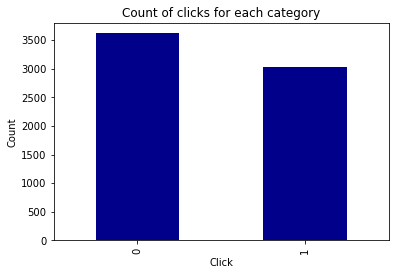

In [12]:
df['Clicked'].value_counts().plot(kind='bar', color='darkblue')
plt.title('Count of clicks for each category')
plt.xlabel('Click')
plt.ylabel('Count')

In [13]:
df['Clicked'].value_counts()/len(df)

0    0.543638
1    0.456362
Name: Clicked, dtype: float64

**For the data the overall click through rate is 46%, and 54% is not clicked.**

Text(0, 0.5, 'Count')

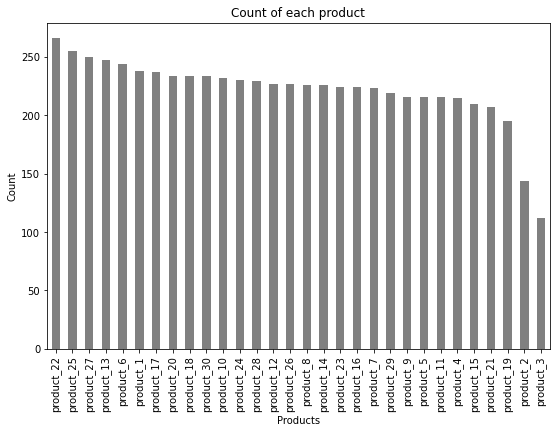

In [14]:
df['Ad_Topic'].value_counts().plot(kind='bar', color='gray',figsize = [9,6])
plt.title('Count of each product')
plt.xlabel('Products')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

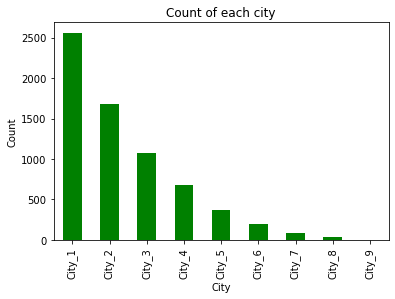

In [15]:
df['City_code'].value_counts().plot(kind='bar', color='green',figsize = [6,4])
plt.title('Count of each city')
plt.xlabel('City')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

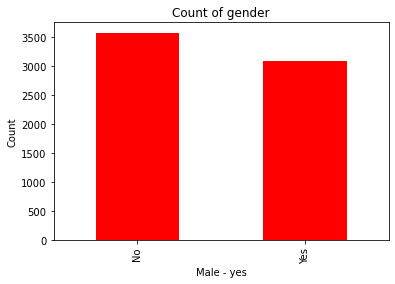

In [16]:
df['Male'].value_counts().plot(kind='bar', color='red')
plt.title('Count of gender')
plt.xlabel('Male - yes')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

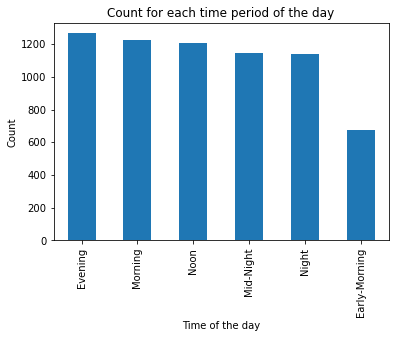

In [17]:
df['Time_Period'].value_counts().plot(kind='bar')
plt.title('Count for each time period of the day')
plt.xlabel('Time of the day')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

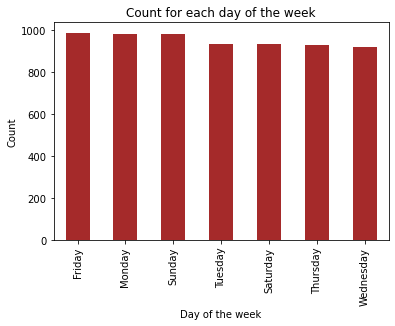

In [18]:
df['Weekday'].value_counts().plot(kind='bar', color='brown')
plt.title('Count for each day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

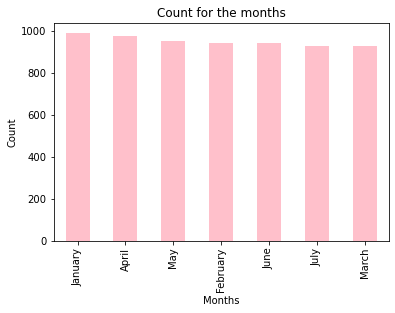

In [19]:
df['Month'].value_counts().plot(kind='bar', color='pink')
plt.title('Count for the months')
plt.xlabel('Months')
plt.ylabel('Count')

**We visualise the continuous predictor variables using histograms**

Based on data exploration it can be seen that there are four continuous predictor variables - "Time_Spent", "Age", "Avg_Income" and "Internet_Usage"

array([[<AxesSubplot:title={'center':'Time_Spent'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Avg_Income'}>,
        <AxesSubplot:title={'center':'Internet_Usage'}>]], dtype=object)

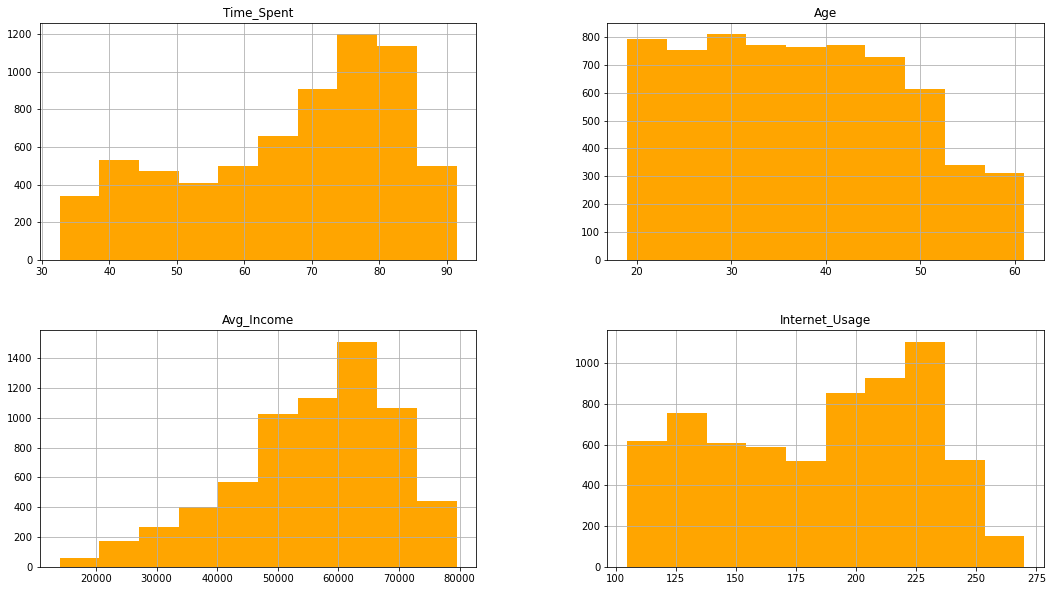

In [20]:
df.hist(["Time_Spent", "Age", "Avg_Income", "Internet_Usage"], figsize=(18,10), color = 'orange')

 In the above histograms: 
 
For "Time_Spent" - there are around 1200 rows in data that has a value between 70 to 75

For "Age" - there are around 800 rows in data that has a value between 28 to 31

For "Avg_Income" - there are over 1400 rows in data that has a value between 60000 to 65000

For "Internet_Usage" - there are around 1100 rows in data that has a value between 224 to 240

array([[<AxesSubplot:xlabel='Time_Spent', ylabel='Time_Spent'>,
        <AxesSubplot:xlabel='Age', ylabel='Time_Spent'>,
        <AxesSubplot:xlabel='Avg_Income', ylabel='Time_Spent'>,
        <AxesSubplot:xlabel='Internet_Usage', ylabel='Time_Spent'>],
       [<AxesSubplot:xlabel='Time_Spent', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Avg_Income', ylabel='Age'>,
        <AxesSubplot:xlabel='Internet_Usage', ylabel='Age'>],
       [<AxesSubplot:xlabel='Time_Spent', ylabel='Avg_Income'>,
        <AxesSubplot:xlabel='Age', ylabel='Avg_Income'>,
        <AxesSubplot:xlabel='Avg_Income', ylabel='Avg_Income'>,
        <AxesSubplot:xlabel='Internet_Usage', ylabel='Avg_Income'>],
       [<AxesSubplot:xlabel='Time_Spent', ylabel='Internet_Usage'>,
        <AxesSubplot:xlabel='Age', ylabel='Internet_Usage'>,
        <AxesSubplot:xlabel='Avg_Income', ylabel='Internet_Usage'>,
        <AxesSubplot:xlabel='Internet_Usage', ylabel='Internet_Usage'

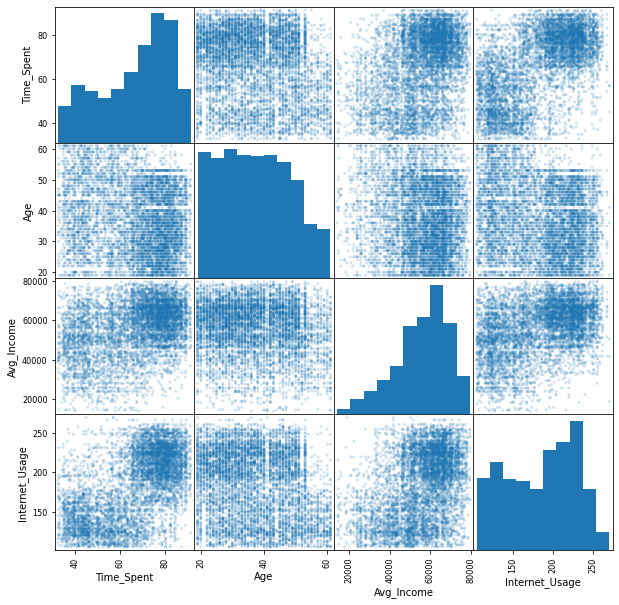

In [21]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['Time_Spent', 'Age','Avg_Income', 'Internet_Usage']]
               ,alpha=0.2, figsize=(10,10))

***From the above scatter matrix we can conclude the following:***

 - **People of lower age group spend more time on the website, it can be implied that users between the age group of 20 to 40 can be considered as our target customers, so the website should show ads of products that cater to younger age group, this will increase the number of clicks hence the profit.**

 - **People with high income spend more time on the website so the company can show ad of products that usually rich people buy, this can increase the number of clicks.**

 - **People who spend more time on the internet also spend more time on this website.**

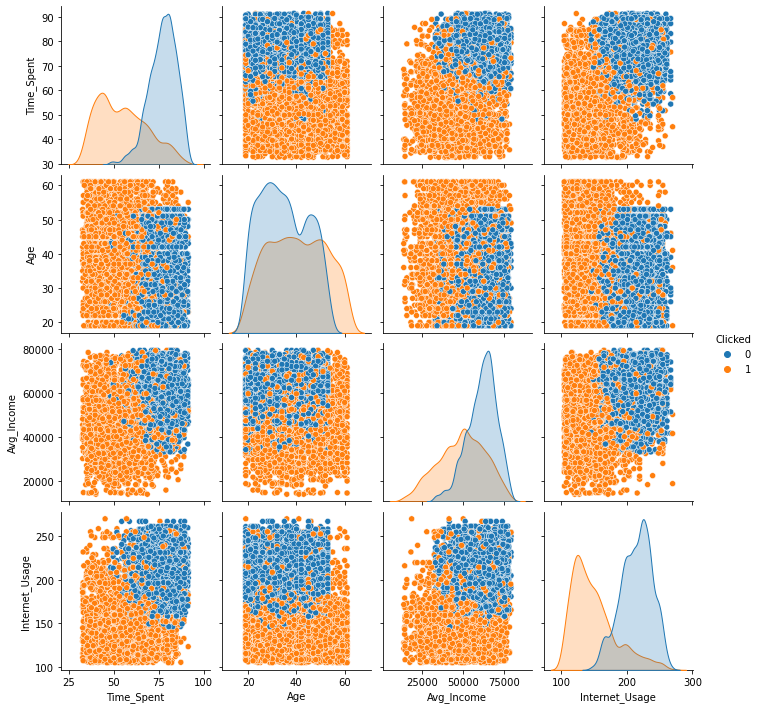

In [22]:
# Creating a pairplot with hue defined by Clicked on Ad column

sns.pairplot(df, hue = 'Clicked', vars = ['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage'])

In [23]:
df.corr()

,Time_Spent,Age,Avg_Income,Internet_Usage,Clicked
Time_Spent,1.000000,-0.185667,0.364737,0.588360,-0.712439
Age,-0.185667,1.000000,-0.104503,-0.199750,0.244121
Avg_Income,0.364737,-0.104503,1.000000,0.383978,-0.460287
Internet_Usage,0.588360,-0.199750,0.383978,1.000000,-0.742764
Clicked,-0.712439,0.244121,-0.460287,-0.742764,1.000000


**As per the correlation matrix above we can see that people who spend less time on the website and used less internet clicked on the ads more**

# Feature extraction using visualisation:

**We analyze the relation between the categorical target variable and the continuous predictor variable using boxplots:**

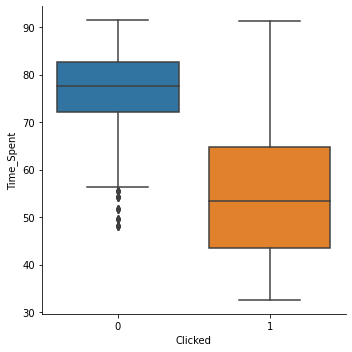

In [24]:
sns.catplot(x="Clicked", y="Time_Spent", kind="box", data= df)

**The people who clicked on ads have spent lesser time on the site as compared to people who did not click**

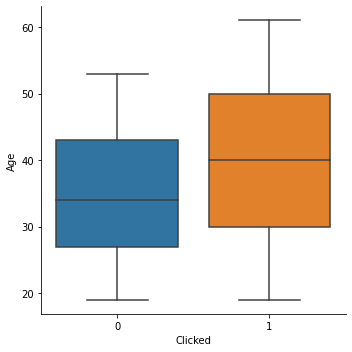

In [25]:
sns.catplot(x="Clicked", y="Age", kind="box", data= df)

**The people who clicked on ads belong to an older age group as compared to people who did not click**

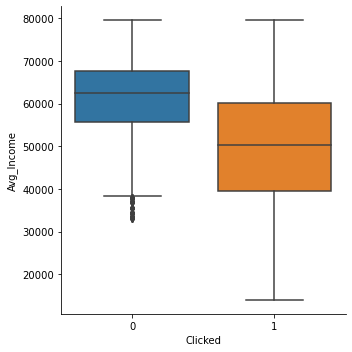

In [26]:
sns.catplot(x="Clicked", y="Avg_Income", kind="box", data= df)

**The people who clicked on ads are of a lower income group as compared to people who did not click**

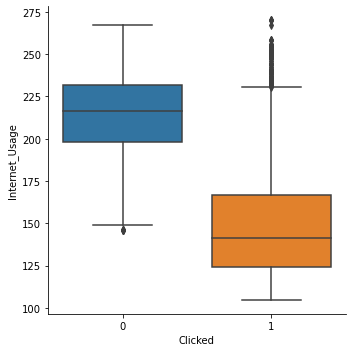

In [27]:
sns.catplot(x="Clicked", y="Internet_Usage", kind="box", data= df)

**The people who clicked on ads have less internet usage as compared to people who did not click**

**We use grouped bar charts to compare and analyse two catagorical variables and the target variable:**

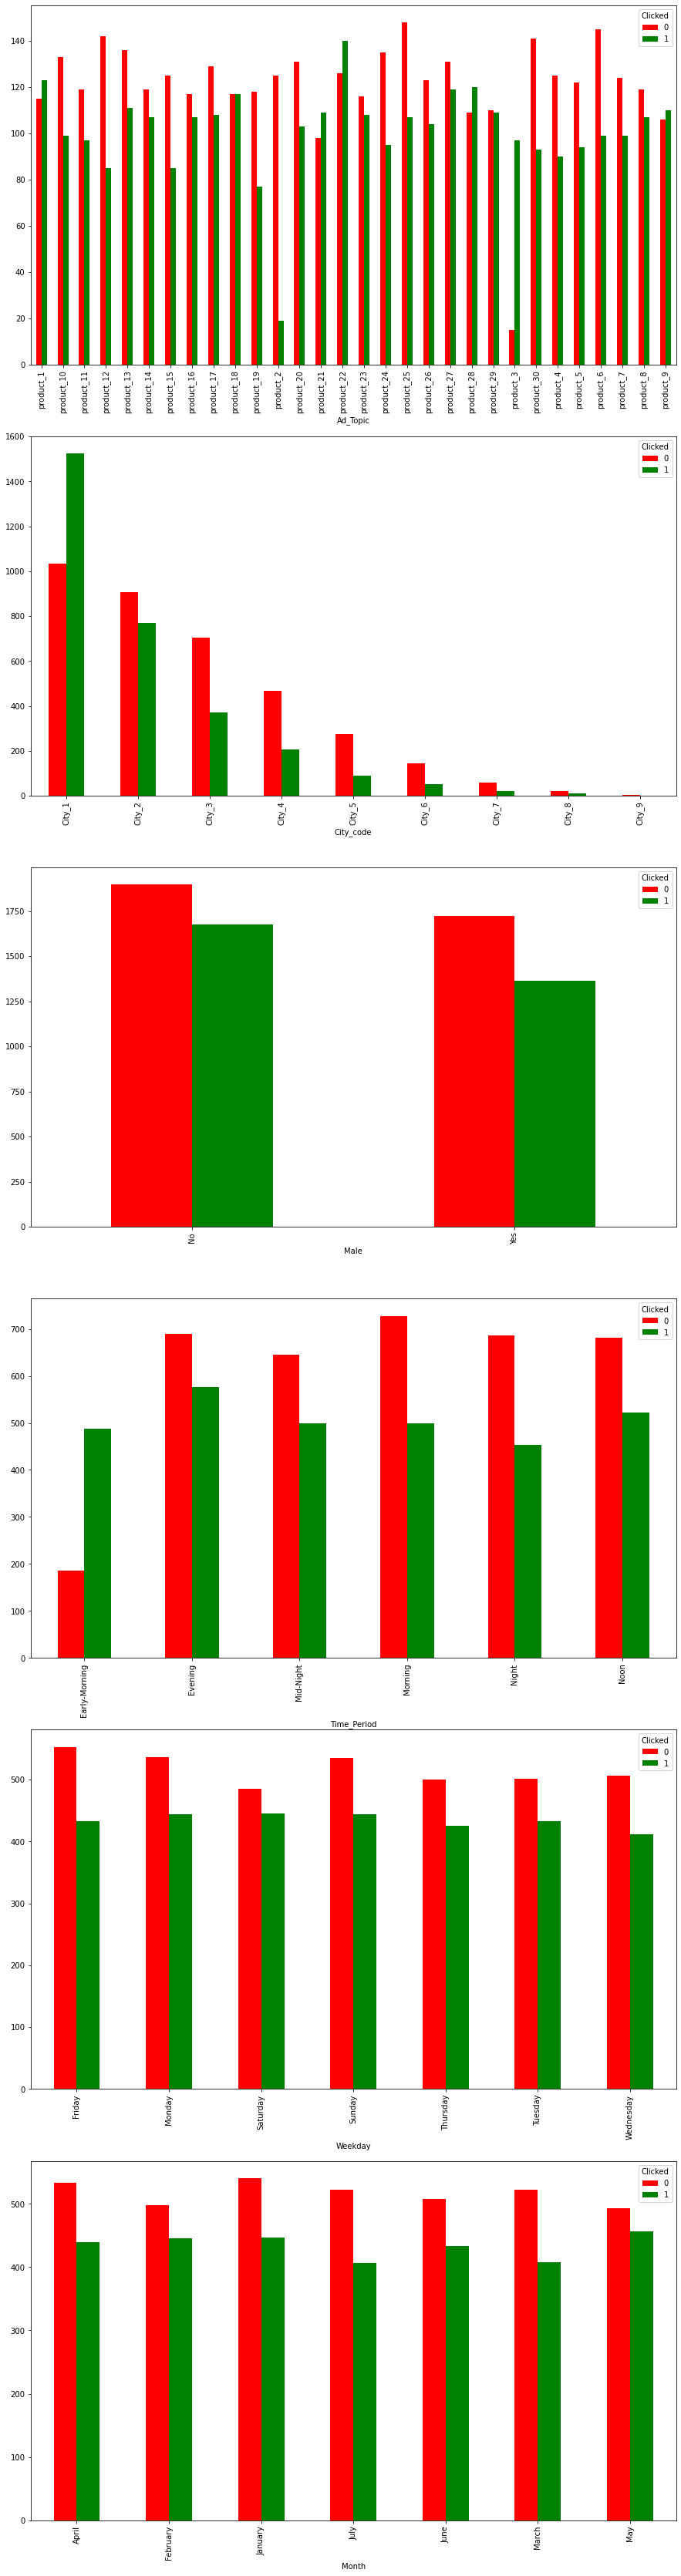

In [28]:
CategoricalColsList = ["Ad_Topic","City_code", "Male", "Time_Period", "Weekday","Month"]

import matplotlib.pyplot as plt
fig, PlotCanvas = plt.subplots(nrows = len(CategoricalColsList), ncols=1, figsize = (15,60))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Clicked"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult = pd.crosstab(index = df[CategoricalCol], columns = df['Clicked'])
    CrossTabResult.plot.bar(color = ['red','green'], ax = PlotCanvas[i])

The two columns are not related if the ratio of bars is the same for all categories. Each month's clicked-to-not-clicked ratio is comparable, indicating that the month has no bearing on ad clicks. So, there is no correlation between these two factors. 

In the Time Period vs. Clicked plot, early in the morning, clicks are at an all-time high. It implies that Time Period influences Ad Click. Consequently, there is a correlation between two columns.

**From the above graphical analysis we can drop 'Weekday' and 'Month' from the dataframe and not use them for building our model**

# Seperating the columns into independent (X) and dependent (Y) variables:

In [29]:
# x is predictor variable
x = df[["Time_Spent","Age","Avg_Income","Internet_Usage","Ad_Topic","City_code", "Male","Time_Period"]]
x[0:5]

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon


In [30]:
# y is target variable
y = df[['Clicked']]
y[0:5]

,Clicked
0,0
1,1
2,0
3,1
4,0


# Converting categorical columns to numeric:

In [33]:
# converting binary nominal variables using 1/0 mapping
x['Male'].replace({'Yes':1, 'No':0}, inplace=True)

x.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period
0,87.97,43,55901.12,185.46,product_11,City_5,0,Mid-Night
1,51.63,50,39132.00,176.73,product_8,City_1,0,Evening
2,82.37,38,57032.36,210.60,product_6,City_2,0,Morning
3,62.06,45,48868.00,190.05,product_19,City_3,1,Morning
4,77.66,31,61608.23,204.86,product_11,City_2,0,Noon


In [34]:
# converting all nominal variables at once using dummy variables
x = pd.get_dummies(x)

# Printing sample rows
x.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Male,Ad_Topic_product_1,Ad_Topic_product_10,Ad_Topic_product_11,Ad_Topic_product_12,Ad_Topic_product_13,...,City_code_City_6,City_code_City_7,City_code_City_8,City_code_City_9,Time_Period_Early-Morning,Time_Period_Evening,Time_Period_Mid-Night,Time_Period_Morning,Time_Period_Night,Time_Period_Noon
0,87.97,43,55901.12,185.46,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,51.63,50,39132.00,176.73,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,82.37,38,57032.36,210.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,62.06,45,48868.00,190.05,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,77.66,31,61608.23,204.86,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
x.columns

Index(['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Male',
       'Ad_Topic_product_1', 'Ad_Topic_product_10', 'Ad_Topic_product_11',
       'Ad_Topic_product_12', 'Ad_Topic_product_13', 'Ad_Topic_product_14',
       'Ad_Topic_product_15', 'Ad_Topic_product_16', 'Ad_Topic_product_17',
       'Ad_Topic_product_18', 'Ad_Topic_product_19', 'Ad_Topic_product_2',
       'Ad_Topic_product_20', 'Ad_Topic_product_21', 'Ad_Topic_product_22',
       'Ad_Topic_product_23', 'Ad_Topic_product_24', 'Ad_Topic_product_25',
       'Ad_Topic_product_26', 'Ad_Topic_product_27', 'Ad_Topic_product_28',
       'Ad_Topic_product_29', 'Ad_Topic_product_3', 'Ad_Topic_product_30',
       'Ad_Topic_product_4', 'Ad_Topic_product_5', 'Ad_Topic_product_6',
       'Ad_Topic_product_7', 'Ad_Topic_product_8', 'Ad_Topic_product_9',
       'City_code_City_1', 'City_code_City_2', 'City_code_City_3',
       'City_code_City_4', 'City_code_City_5', 'City_code_City_6',
       'City_code_City_7', 'City_code_City_8', 

In [36]:
Predictors=['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Male',
       'Ad_Topic_product_1', 'Ad_Topic_product_10', 'Ad_Topic_product_11',
       'Ad_Topic_product_12', 'Ad_Topic_product_13', 'Ad_Topic_product_14',
       'Ad_Topic_product_15', 'Ad_Topic_product_16', 'Ad_Topic_product_17',
       'Ad_Topic_product_18', 'Ad_Topic_product_19', 'Ad_Topic_product_2',
       'Ad_Topic_product_20', 'Ad_Topic_product_21', 'Ad_Topic_product_22',
       'Ad_Topic_product_23', 'Ad_Topic_product_24', 'Ad_Topic_product_25',
       'Ad_Topic_product_26', 'Ad_Topic_product_27', 'Ad_Topic_product_28',
       'Ad_Topic_product_29', 'Ad_Topic_product_3', 'Ad_Topic_product_30',
       'Ad_Topic_product_4', 'Ad_Topic_product_5', 'Ad_Topic_product_6',
       'Ad_Topic_product_7', 'Ad_Topic_product_8', 'Ad_Topic_product_9',
       'City_code_City_1', 'City_code_City_2', 'City_code_City_3',
       'City_code_City_4', 'City_code_City_5', 'City_code_City_6',
       'City_code_City_7', 'City_code_City_8', 'City_code_City_9',
       'Time_Period_Early-Morning', 'Time_Period_Evening',
       'Time_Period_Mid-Night', 'Time_Period_Morning', 'Time_Period_Night',
       'Time_Period_Noon']

In [37]:
TargetVariable='Clicked'

# Splitting the data into training and testing sets:

The training data is the subset (bigger) of the original dataset, which is used to train or fit the machine learning modeln and the test dataset is another subset (smaller) of original data, which is independent of the training datase and is used to evaluate the model. Splitting the dataset into train and test sets improve the performance of our model and giving better predictability.

In [38]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

70% of our data is split into training set and another 30% into testing set

*The train and test sets directly affect the model’s performance score. Because we get different train and test sets with different integer values for random_state in the train_test_split() function, the value of the random state hyperparameter indirectly affects the model’s performance score.*

# Scaling the features using standardisation:

*Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. The mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.*

In [39]:
# Import StandardScaler function
from sklearn.preprocessing import StandardScaler

In [40]:
# Scaling the data
sc_x = StandardScaler()

X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.fit_transform(X_test)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4659, 50)
(4659, 1)
(1998, 50)
(1998, 1)


# Model Building for classification:

 - **NAIVE BAYES**

The Naive Bayes classification algorithm is a probabilistic machine learning classifier. It is based on probability models that incorporate strong independence assumptions. The independence assumptions often do not have an impact on reality. Therefore they are considered as naive.

In [42]:
from sklearn.naive_bayes import GaussianNB 
# GaussianNB is used in Binomial Classification

model = GaussianNB()

NB= model.fit(X_train, y_train)

# Predicting the Test set results
Y_pred = NB.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score 
ac = accuracy_score(y_test,Y_pred)
print('Accuracy of the model is:',ac)

Accuracy of the model is: 0.5405405405405406


Accuracy expresses the fraction of instances that are classified correctly, it is the most intuitive metric that is usually used in classification tasks.

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test,Y_pred))

[[1080    0]
 [ 918    0]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1080
           1       0.00      0.00      0.00       918

    accuracy                           0.54      1998
   macro avg       0.27      0.50      0.35      1998
weighted avg       0.29      0.54      0.38      1998



**The confusion matrix tells us that the total number of accurate predictions is 1080 + 0 = 1080. On the other hand, the number of incorrect predictions is 918 + 0 = 918. The accuracy of this model is poor.**

**The accuracy for the naive bayes model is only 54 percent**

 - **SUPPORT VECTOR MACHINE**

Support Vector Machine (SVM) is a supervised machine learning algorithm capable of performing classification, regression and even outlier detection. The linear SVM classifier works by drawing a straight line between two classes. All the data points that fall on one side of the line will be labeled as one class and all the points that fall on the other side will be labeled as the second.

In [45]:
#import SVC classifier 
from sklearn.svm import SVC

#Create a svm Classifier
support_vector_classifier = SVC(kernel='linear') 

# fit classifier to training set
SVM = support_vector_classifier.fit(X_train,y_train)

#Predict the response for test dataset
Y_pred = SVM.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score 
ac = accuracy_score(y_test,Y_pred)
print('Accuracy of the model is:',ac)

Accuracy of the model is: 0.9344344344344344


In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test,Y_pred))

[[1055   25]
 [ 106  812]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1080
           1       0.97      0.88      0.93       918

    accuracy                           0.93      1998
   macro avg       0.94      0.93      0.93      1998
weighted avg       0.94      0.93      0.93      1998



**The confusion matrix tells us that the total number of accurate predictions is 1055 + 812 = 1867. On the other hand, the number of incorrect predictions is 25 + 106 = 131. The accuracy of this model is good.**

**The accuracy for SVM is 93.4 percent**

**TO SEE WHICH FEATURES ARE IMPORTANT FOR THE SVM MODEL AS PER OUR DATASET:**

Feature (variable) importance indicates how much each feature contributes to the model prediction. It determines the degree of usefulness of a specific variable for a current model and prediction.

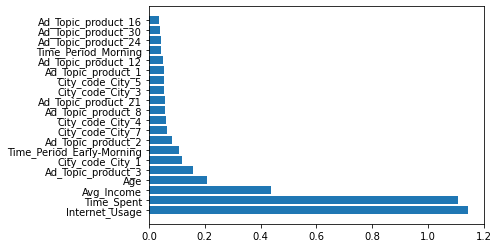

In [48]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# name of all the features
features_names = ['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Male',
       'Ad_Topic_product_1', 'Ad_Topic_product_10', 'Ad_Topic_product_11',
       'Ad_Topic_product_12', 'Ad_Topic_product_13', 'Ad_Topic_product_14',
       'Ad_Topic_product_15', 'Ad_Topic_product_16', 'Ad_Topic_product_17',
       'Ad_Topic_product_18', 'Ad_Topic_product_19', 'Ad_Topic_product_2',
       'Ad_Topic_product_20', 'Ad_Topic_product_21', 'Ad_Topic_product_22',
       'Ad_Topic_product_23', 'Ad_Topic_product_24', 'Ad_Topic_product_25',
       'Ad_Topic_product_26', 'Ad_Topic_product_27', 'Ad_Topic_product_28',
       'Ad_Topic_product_29', 'Ad_Topic_product_3', 'Ad_Topic_product_30',
       'Ad_Topic_product_4', 'Ad_Topic_product_5', 'Ad_Topic_product_6',
       'Ad_Topic_product_7', 'Ad_Topic_product_8', 'Ad_Topic_product_9',
       'City_code_City_1', 'City_code_City_2', 'City_code_City_3',
       'City_code_City_4', 'City_code_City_5', 'City_code_City_6',
       'City_code_City_7', 'City_code_City_8', 'City_code_City_9',
       'Time_Period_Early-Morning', 'Time_Period_Evening',
       'Time_Period_Mid-Night', 'Time_Period_Morning', 'Time_Period_Night',
       'Time_Period_Noon']

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(SVM.coef_[0]), features_names, top=20)

**From the above graph we can see top 7 features are:**

 - 'Internet_Usage'
 - 'Time_Spent'
 - 'Avg_Income'
 - 'Age'
 - 'Ad_Topic_product_3'
 - 'City_code_city_1'
 - Time_Period_Early-Morning'


 -  **DECISION TREES**

In [49]:
#Decision Trees
from sklearn import tree

#choose from different tunable hyper parameters
DT = tree.DecisionTreeClassifier(max_depth = 3 ,criterion='gini')

# Creating the model on Training Data
DTree = DT.fit(X_train,y_train)

Y_pred = DTree.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score 
ac = accuracy_score(y_test,Y_pred)
print('Accuracy of the model is:', ac)

Accuracy of the model is: 0.9264264264264265


In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test,Y_pred))

[[1042   38]
 [ 109  809]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1080
           1       0.96      0.88      0.92       918

    accuracy                           0.93      1998
   macro avg       0.93      0.92      0.93      1998
weighted avg       0.93      0.93      0.93      1998



**The confusion matrix tells us that the total number of accurate predictions is 1042 + 809 = 1851. On the other hand, the number of incorrect predictions is 28 + 109 = 137. The accuracy of this model is less than that of SVM but by a small percentage.**

**The accuracy for the decision tree model is 92.6 percent**

**Plotting a Decision Tree**

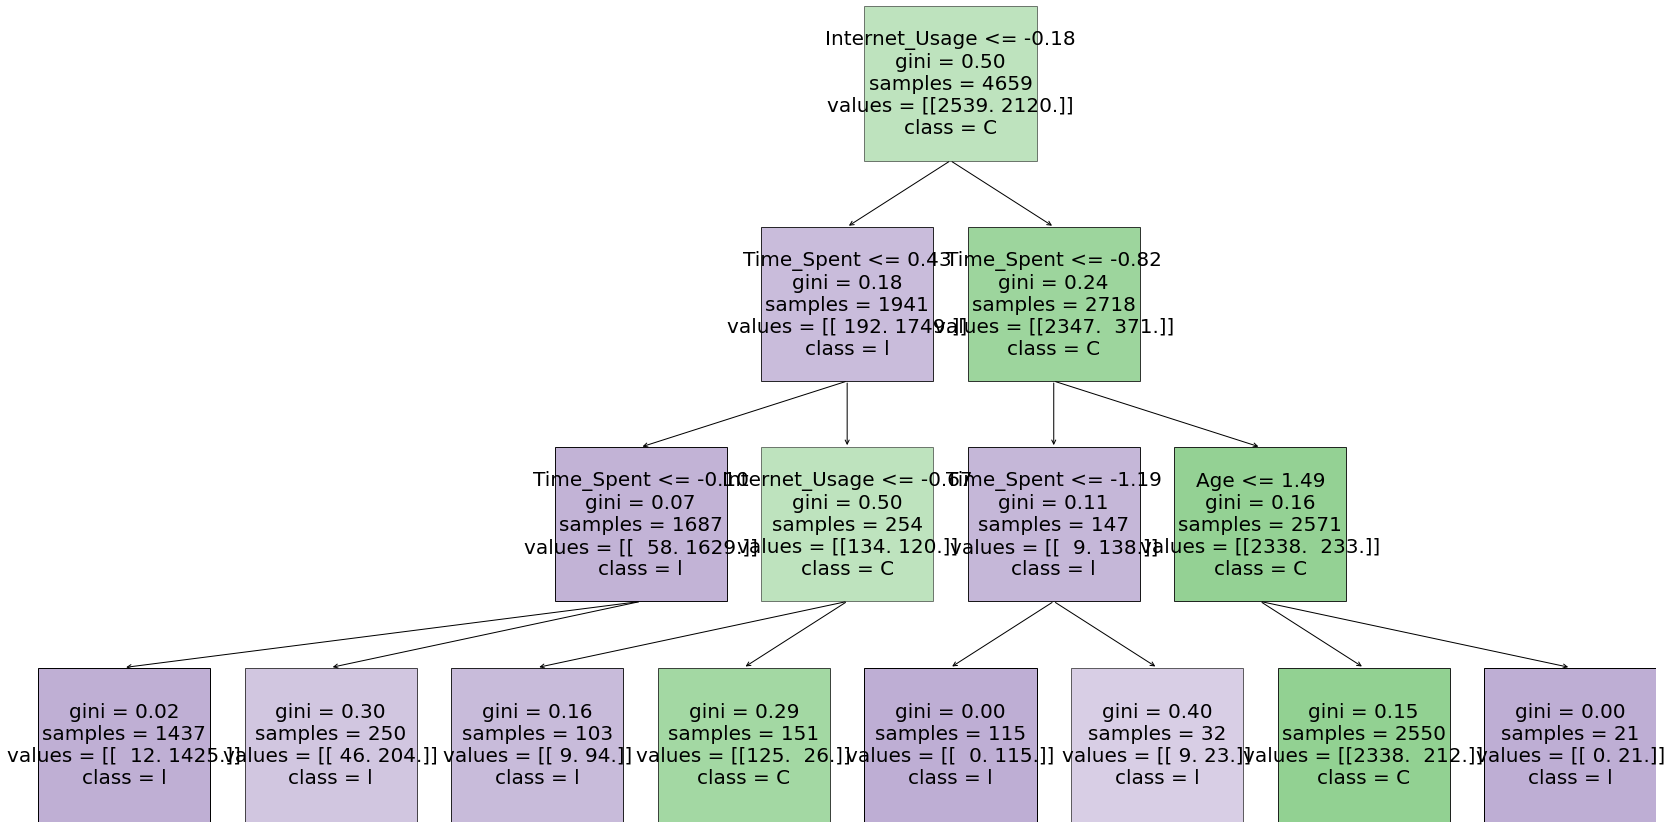

In [52]:
from dtreeplt import dtreeplt

dtree = dtreeplt(model=DT, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(29,15)

 -  **RANDOM FOREST**

Random forest or Random Decision Forest is a method that operates by constructing multiple decision trees during training phases. The decision of the majority of the trees is chosen as final decision.

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

Y_pred = rf.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score 
ac = accuracy_score(y_test,Y_pred)
print('Accuracy of the model is:', ac)

Accuracy of the model is: 0.9419419419419419


In [55]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test,Y_pred))

[[1049   31]
 [  85  833]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1080
           1       0.96      0.91      0.93       918

    accuracy                           0.94      1998
   macro avg       0.94      0.94      0.94      1998
weighted avg       0.94      0.94      0.94      1998



In [56]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

Root Mean Squared Error: 0.24095239790891906


Root Mean Squared Error (RMSE) is a measure of the difference between predicted and actual values in a dataset.  A lower RMSE value indicates that the model is better able to predict the target variable based on the input features. An RMSE value of 0.24 means that, on average, the model's predictions deviate from the actual values by 0.24 units.

**The confusion matrix tells us that the total number of accurate predictions is 1049 + 833 = 1882. On the other hand, the number of incorrect predictions is 85 + 31 = 116. The accuracy of this model is more than all the other models that we have built.**

**The accuracy for the decision tree model is 94.2 percent**

# Conclusion:

 - Random forest model is the best out of all the models that we built.

 - People who spend more time on the website are clicking on ads less as compared to people who spend less time on the site and it is the people of lower age group who are spending more time on the site so to increase the number of clicks, the website should show ads of products that cater to the younger age group. This means that the company should focus on targeting ads for products and services that are likely to be of interest to younger users, such as fashion, technology, and entertainment. Using more modern design or featuring more current trends will be helpful.

 - It is also seen that people who are rich are clicking less on the ads even though they are spending more time on the website. One reason for not clicking could be that the site is showing ads of products that lower income group people buy. To increase the clicks the company can show ads of products that usually rich people buy This means that the company should focus on targeting ads for luxury products or high-end services that are likely to be of interest to wealthier users.

 - It is also seen that people who spend more time on the internet also spend more time on this website. This means that the company should focus on making sure that the website is easy to navigate and use for users who are already spending a lot of time online. This can be done by optimizing the website's layout, design, and functionality to make it more user-friendly.


These informations can be used to target different groups of users with different types of ads or to optimize the placement of ads on the website to optimize the user experience. 



